In [1]:
from keras import optimizers, regularizers
from keras.layers import Dense, Dropout, Input
from keras.models import Model, Sequential
from random import shuffle
from scipy import interp
from sklearn.linear_model import LogisticRegression
from scipy.stats.mstats import gmean
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import QuantileTransformer
import contextlib
import glob
import gzip
import h5py
import keras
import numpy as np
import os
import pandas as pd
import pylab as plt
import random
import scipy
import sklearn
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification



random_state = np.random.RandomState(0)


Using TensorFlow backend.


In [2]:
X_f = '/home/drewe/notebooks/genotox/GenoTox-database.csv'
y_f = '/home/drewe/notebooks/genotox/outcome-mod-2.csv'

X = pd.read_csv(X_f).values[:,:-1]
y = pd.read_csv(y_f).values


ix = [i for i in range(y.shape[0])]
shuffle(ix)
X  = X[ix, :]
y = y[ix]
names = pd.read_csv(X_f)['Unnamed: 0'][ix].values
X = sklearn.preprocessing.quantile_transform(X, axis=0, output_distribution='uniform', copy=True)
y = y[: ,0]



>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 34us/step - loss: 0.4109 - acc: 0.8058
Epoch 2/50
7272/7272 [==============================] - 0s 34us/step - loss: 0.3981 - acc: 0.8133
Epoch 3/50
7272/7272 [==============================] - 0s 34us/step - loss: 0.4038 - acc: 0.8046
Epoch 4/50
7272/7272 [==============================] - 0s 34us/step - loss: 0.3869 - acc: 0.8196
Epoch 5/50
7272/7272 [==============================] - 0s 34us/step - loss: 0.3724 - acc: 0.8258
Epoch 6/50
7272/7272 [==============================] - 0s 34us/step - loss: 0.3895 - acc: 0.8194
Epoch 7/50
7272/7272 [==============================] - 0s 34us/step - loss: 0.3761 - acc: 0.8219
Epoch 8/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.3636 - acc: 0.8332
Epoch 9/50
7272/7272 [==============================] - 0s 34us/step - loss: 0.3596 - acc: 0.8288
Epoch 10/50
7272/7272 [==============================] - 0s 33us/step - loss: 0.3411 - acc: 0.8392
Epoch 11/50
72

7272/7272 [==============================] - 0s 38us/step - loss: 0.2248 - acc: 0.9015
Epoch 34/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2191 - acc: 0.9028
Epoch 35/50
7272/7272 [==============================] - 0s 34us/step - loss: 0.2245 - acc: 0.9006
Epoch 36/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2254 - acc: 0.9026
Epoch 37/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2263 - acc: 0.8959
Epoch 38/50
7272/7272 [==============================] - 0s 34us/step - loss: 0.2261 - acc: 0.8998
Epoch 39/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2013 - acc: 0.9120
Epoch 40/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.1990 - acc: 0.9149
Epoch 41/50
7272/7272 [==============================] - 0s 43us/step - loss: 0.2055 - acc: 0.9028
Epoch 42/50
7272/7272 [==============================] - 0s 42us/step - loss: 0.2134 - acc: 0.9039
Epoch 43/50
7272/7272 

Epoch 16/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2938 - acc: 0.8662
Epoch 17/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2848 - acc: 0.8692
Epoch 18/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2739 - acc: 0.8744
Epoch 19/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2817 - acc: 0.8725
Epoch 20/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2864 - acc: 0.8702
Epoch 21/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2576 - acc: 0.8833
Epoch 22/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2606 - acc: 0.8824
Epoch 23/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2640 - acc: 0.8789
Epoch 24/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2663 - acc: 0.8819
Epoch 25/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2655 - acc: 0.8819
Epoch 26/5

7272/7272 [==============================] - 0s 37us/step - loss: 0.2158 - acc: 0.9031
Epoch 49/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2219 - acc: 0.9013
Epoch 50/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2251 - acc: 0.9026
   0.6748791412133058
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.3791 - acc: 0.8221
Epoch 2/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.3680 - acc: 0.8288
Epoch 3/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.3579 - acc: 0.8373
Epoch 4/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.3578 - acc: 0.8348
Epoch 5/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3543 - acc: 0.8351
Epoch 6/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.3346 - acc: 0.8435
Epoch 7/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3312 - acc: 0.8463
Ep

7272/7272 [==============================] - 0s 36us/step - loss: 0.2332 - acc: 0.8952
Epoch 31/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2219 - acc: 0.8978
Epoch 32/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2451 - acc: 0.8849
Epoch 33/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2303 - acc: 0.8965
Epoch 34/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.2146 - acc: 0.9031
Epoch 35/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2015 - acc: 0.9076
Epoch 36/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2169 - acc: 0.8993
Epoch 37/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2060 - acc: 0.9024
Epoch 38/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2003 - acc: 0.9097
Epoch 39/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2276 - acc: 0.8966
Epoch 40/50
7272/7272 

Epoch 13/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3232 - acc: 0.8489
Epoch 14/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3418 - acc: 0.8434
Epoch 15/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3014 - acc: 0.8575
Epoch 16/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3068 - acc: 0.8573
Epoch 17/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2939 - acc: 0.8648
Epoch 18/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2916 - acc: 0.8655
Epoch 19/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2822 - acc: 0.8688
Epoch 20/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2791 - acc: 0.8702
Epoch 21/50
7272/7272 [==============================] - 0s 41us/step - loss: 0.3126 - acc: 0.8526
Epoch 22/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2698 - acc: 0.8754
Epoch 23/5

7272/7272 [==============================] - 0s 37us/step - loss: 0.2305 - acc: 0.8947
Epoch 46/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2236 - acc: 0.8984
Epoch 47/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2332 - acc: 0.8936
Epoch 48/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2486 - acc: 0.8878
Epoch 49/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2111 - acc: 0.9044
Epoch 50/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2158 - acc: 0.9040
   0.6412102422077485
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.4061 - acc: 0.8051
Epoch 2/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3959 - acc: 0.8080
Epoch 3/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.3914 - acc: 0.8131
Epoch 4/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.3792 - acc: 0.8214

7272/7272 [==============================] - 0s 36us/step - loss: 0.2415 - acc: 0.8916
Epoch 28/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2454 - acc: 0.8896
Epoch 29/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2220 - acc: 0.9025
Epoch 30/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2278 - acc: 0.9000
Epoch 31/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2265 - acc: 0.9006
Epoch 32/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2262 - acc: 0.8971
Epoch 33/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2274 - acc: 0.9011
Epoch 34/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2055 - acc: 0.9124
Epoch 35/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2112 - acc: 0.9024
Epoch 36/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2163 - acc: 0.9055
Epoch 37/50
7272/7272 

Epoch 10/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2919 - acc: 0.8640
Epoch 11/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2941 - acc: 0.8656
Epoch 12/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2815 - acc: 0.8725
Epoch 13/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2716 - acc: 0.8772
Epoch 14/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2741 - acc: 0.8812
Epoch 15/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2701 - acc: 0.8773
Epoch 16/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2655 - acc: 0.8802
Epoch 17/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2586 - acc: 0.8833
Epoch 18/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2505 - acc: 0.8857
Epoch 19/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2522 - acc: 0.8919
Epoch 20/5

7272/7272 [==============================] - 0s 38us/step - loss: 0.2229 - acc: 0.8995
Epoch 43/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2022 - acc: 0.9121
Epoch 44/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.1831 - acc: 0.9168
Epoch 45/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.1979 - acc: 0.9125
Epoch 46/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2045 - acc: 0.9098
Epoch 47/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2228 - acc: 0.9015
Epoch 48/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2044 - acc: 0.9070
Epoch 49/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.1925 - acc: 0.9163
Epoch 50/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.1860 - acc: 0.9212
   0.6547671568627451
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.3908 - acc: 0.8

7272/7272 [==============================] - 0s 36us/step - loss: 0.2564 - acc: 0.8839
Epoch 25/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.2471 - acc: 0.8881
Epoch 26/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2519 - acc: 0.8842
Epoch 27/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2430 - acc: 0.8907
Epoch 28/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2393 - acc: 0.8911
Epoch 29/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.2454 - acc: 0.8892
Epoch 30/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2292 - acc: 0.8967
Epoch 31/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2202 - acc: 0.9000
Epoch 32/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2306 - acc: 0.8948
Epoch 33/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2316 - acc: 0.8996
Epoch 34/50
7272/7272 

7272/7272 [==============================] - 0s 36us/step - loss: 0.3772 - acc: 0.8226
Epoch 7/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3797 - acc: 0.8175
Epoch 8/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3717 - acc: 0.8259
Epoch 9/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3656 - acc: 0.8307
Epoch 10/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3580 - acc: 0.8370
Epoch 11/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3533 - acc: 0.8359
Epoch 12/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3535 - acc: 0.8397
Epoch 13/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3493 - acc: 0.8376
Epoch 14/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3404 - acc: 0.8413
Epoch 15/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3408 - acc: 0.8395
Epoch 16/50
7272/7272 [==

Epoch 39/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2150 - acc: 0.9043
Epoch 40/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2351 - acc: 0.8897
Epoch 41/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2232 - acc: 0.9000
Epoch 42/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2165 - acc: 0.9043
Epoch 43/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2165 - acc: 0.9029
Epoch 44/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2073 - acc: 0.9076
Epoch 45/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2064 - acc: 0.9086
Epoch 46/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2135 - acc: 0.9026
Epoch 47/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2009 - acc: 0.9091
Epoch 48/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2050 - acc: 0.9065
Epoch 49/5

7272/7272 [==============================] - 0s 36us/step - loss: 0.2525 - acc: 0.8846
Epoch 22/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2527 - acc: 0.8875
Epoch 23/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2447 - acc: 0.8933
Epoch 24/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2465 - acc: 0.8903
Epoch 25/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2263 - acc: 0.8998
Epoch 26/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2352 - acc: 0.8914
Epoch 27/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2248 - acc: 0.9000
Epoch 28/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2398 - acc: 0.8932
Epoch 29/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2334 - acc: 0.8976
Epoch 30/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2241 - acc: 0.9017
Epoch 31/50
7272/7272 

7272/7272 [==============================] - 0s 36us/step - loss: 0.4234 - acc: 0.7974
Epoch 4/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.4165 - acc: 0.8002
Epoch 5/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.4142 - acc: 0.7995
Epoch 6/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.4104 - acc: 0.7994
Epoch 7/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.4223 - acc: 0.7973
Epoch 8/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.4030 - acc: 0.8094
Epoch 9/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3903 - acc: 0.8177
Epoch 10/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3987 - acc: 0.8116
Epoch 11/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3844 - acc: 0.8194
Epoch 12/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3863 - acc: 0.8185
Epoch 13/50
7272/7272 [=====

Epoch 36/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2405 - acc: 0.8916
Epoch 37/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2443 - acc: 0.8943
Epoch 38/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2380 - acc: 0.8918
Epoch 39/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2258 - acc: 0.8967
Epoch 40/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2114 - acc: 0.9051
Epoch 41/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2179 - acc: 0.9073
Epoch 42/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2017 - acc: 0.9134
Epoch 43/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2307 - acc: 0.8988
Epoch 44/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2209 - acc: 0.9006
Epoch 45/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2192 - acc: 0.9007
Epoch 46/5

7272/7272 [==============================] - 0s 36us/step - loss: 0.2423 - acc: 0.8941
Epoch 19/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2612 - acc: 0.8791
Epoch 20/50
7272/7272 [==============================] - 0s 35us/step - loss: 0.2549 - acc: 0.8878
Epoch 21/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2412 - acc: 0.8915
Epoch 22/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2444 - acc: 0.8894
Epoch 23/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2393 - acc: 0.8922
Epoch 24/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2283 - acc: 0.9018
Epoch 25/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2216 - acc: 0.9021
Epoch 26/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2154 - acc: 0.9050
Epoch 27/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2216 - acc: 0.9035
Epoch 28/50
7272/7272 

7272/7272 [==============================] - 0s 37us/step - loss: 0.1708 - acc: 0.9248
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3911 - acc: 0.8135
Epoch 2/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3786 - acc: 0.8207
Epoch 3/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3715 - acc: 0.8247
Epoch 4/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3621 - acc: 0.8282
Epoch 5/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3718 - acc: 0.8221
Epoch 6/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3567 - acc: 0.8281
Epoch 7/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3514 - acc: 0.8302
Epoch 8/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3331 - acc: 0.8445
Epoch 9/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.3229 - acc: 0.8500
Epoch 10/50
7272/7272 [===

Epoch 33/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2451 - acc: 0.8900
Epoch 34/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2356 - acc: 0.8945
Epoch 35/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2440 - acc: 0.8938
Epoch 36/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2179 - acc: 0.9046
Epoch 37/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2232 - acc: 0.8992
Epoch 38/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2255 - acc: 0.8989
Epoch 39/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2366 - acc: 0.8959
Epoch 40/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2177 - acc: 0.9044
Epoch 41/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2166 - acc: 0.9009
Epoch 42/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2064 - acc: 0.9058
Epoch 43/5

7272/7272 [==============================] - 0s 37us/step - loss: 0.3350 - acc: 0.8494
Epoch 16/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3410 - acc: 0.8435
Epoch 17/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3545 - acc: 0.8401
Epoch 18/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3218 - acc: 0.8552
Epoch 19/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3307 - acc: 0.8519
Epoch 20/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3141 - acc: 0.8577
Epoch 21/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3135 - acc: 0.8571
Epoch 22/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3052 - acc: 0.8633
Epoch 23/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2983 - acc: 0.8623
Epoch 24/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2897 - acc: 0.8655
Epoch 25/50
7272/7272 

7272/7272 [==============================] - 0s 36us/step - loss: 0.2066 - acc: 0.9084
Epoch 48/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2084 - acc: 0.9083
Epoch 49/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2020 - acc: 0.9095
Epoch 50/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2088 - acc: 0.9048
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3872 - acc: 0.8218
Epoch 2/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3827 - acc: 0.8278
Epoch 3/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.3761 - acc: 0.8288
Epoch 4/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3678 - acc: 0.8300
Epoch 5/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.3758 - acc: 0.8241
Epoch 6/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3588 - acc: 0.8365
Epoch 7/50
7272/7272 [=

Epoch 30/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2287 - acc: 0.9011
Epoch 31/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2311 - acc: 0.8991
Epoch 32/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2151 - acc: 0.9080
Epoch 33/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2462 - acc: 0.8933
Epoch 34/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2160 - acc: 0.9042
Epoch 35/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2062 - acc: 0.9069
Epoch 36/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2174 - acc: 0.9021
Epoch 37/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2147 - acc: 0.9036
Epoch 38/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2256 - acc: 0.9003
Epoch 39/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.1991 - acc: 0.9136
Epoch 40/5

7272/7272 [==============================] - 0s 37us/step - loss: 0.3235 - acc: 0.8465
Epoch 13/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3357 - acc: 0.8452
Epoch 14/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3180 - acc: 0.8519
Epoch 15/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3135 - acc: 0.8555
Epoch 16/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3002 - acc: 0.8599
Epoch 17/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3048 - acc: 0.8577
Epoch 18/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2952 - acc: 0.8641
Epoch 19/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2849 - acc: 0.8677
Epoch 20/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3040 - acc: 0.8574
Epoch 21/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2757 - acc: 0.8744
Epoch 22/50
7272/7272 

7272/7272 [==============================] - 0s 37us/step - loss: 0.2125 - acc: 0.9072
Epoch 45/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2110 - acc: 0.9064
Epoch 46/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2059 - acc: 0.9083
Epoch 47/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.1995 - acc: 0.9121
Epoch 48/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.1844 - acc: 0.9198
Epoch 49/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.1760 - acc: 0.9240
Epoch 50/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.1753 - acc: 0.9209
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3664 - acc: 0.8296
Epoch 2/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3661 - acc: 0.8274
Epoch 3/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.3530 - acc: 0.8342
Epoch 4/50
7272/7272

Epoch 27/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2644 - acc: 0.8789
Epoch 28/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2527 - acc: 0.8849
Epoch 29/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2614 - acc: 0.8824
Epoch 30/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2513 - acc: 0.8871
Epoch 31/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2388 - acc: 0.8929
Epoch 32/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2441 - acc: 0.8885
Epoch 33/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2289 - acc: 0.8941
Epoch 34/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2376 - acc: 0.8903
Epoch 35/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2433 - acc: 0.8926
Epoch 36/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2374 - acc: 0.8932
Epoch 37/5

7272/7272 [==============================] - 0s 36us/step - loss: 0.3433 - acc: 0.8403
Epoch 10/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3464 - acc: 0.8399
Epoch 11/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3280 - acc: 0.8504
Epoch 12/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3313 - acc: 0.8452
Epoch 13/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3167 - acc: 0.8542
Epoch 14/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3042 - acc: 0.8611
Epoch 15/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3112 - acc: 0.8552
Epoch 16/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3079 - acc: 0.8579
Epoch 17/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2973 - acc: 0.8630
Epoch 18/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3049 - acc: 0.8534
Epoch 19/50
7272/7272 

7272/7272 [==============================] - 0s 37us/step - loss: 0.2123 - acc: 0.9047
Epoch 42/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2036 - acc: 0.9091
Epoch 43/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2013 - acc: 0.9113
Epoch 44/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2071 - acc: 0.9081
Epoch 45/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.1956 - acc: 0.9123
Epoch 46/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.1969 - acc: 0.9102
Epoch 47/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.1813 - acc: 0.9174
Epoch 48/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.1827 - acc: 0.9176
Epoch 49/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.1849 - acc: 0.9180
Epoch 50/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.1886 - acc: 0.9174
>>
.
Epoch 1/50
7272/7

Epoch 24/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2510 - acc: 0.8859
Epoch 25/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2496 - acc: 0.8868
Epoch 26/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2432 - acc: 0.8885
Epoch 27/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2559 - acc: 0.8853
Epoch 28/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2356 - acc: 0.8926
Epoch 29/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2244 - acc: 0.8951
Epoch 30/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2250 - acc: 0.9000
Epoch 31/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2357 - acc: 0.8937
Epoch 32/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2287 - acc: 0.8981
Epoch 33/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2251 - acc: 0.8963
Epoch 34/5

7272/7272 [==============================] - 0s 38us/step - loss: 0.3869 - acc: 0.8152
Epoch 7/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3864 - acc: 0.8211
Epoch 8/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3769 - acc: 0.8237
Epoch 9/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3762 - acc: 0.8208
Epoch 10/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3802 - acc: 0.8205
Epoch 11/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3613 - acc: 0.8300
Epoch 12/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.3628 - acc: 0.8299
Epoch 13/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3795 - acc: 0.8229
Epoch 14/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3519 - acc: 0.8335
Epoch 15/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.3446 - acc: 0.8380
Epoch 16/50
7272/7272 [==

Epoch 39/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.1977 - acc: 0.9135
Epoch 40/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2131 - acc: 0.9042
Epoch 41/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2159 - acc: 0.9009
Epoch 42/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2204 - acc: 0.8981
Epoch 43/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2212 - acc: 0.9002
Epoch 44/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.1846 - acc: 0.9178
Epoch 45/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.1921 - acc: 0.9150
Epoch 46/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.1994 - acc: 0.9103
Epoch 47/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.1964 - acc: 0.9134
Epoch 48/50
7272/7272 [==============================] - 0s 36us/step - loss: 0.2167 - acc: 0.9014
Epoch 49/5

7272/7272 [==============================] - 0s 38us/step - loss: 0.2671 - acc: 0.8800
Epoch 22/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2686 - acc: 0.8797
Epoch 23/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2633 - acc: 0.8839
Epoch 24/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2598 - acc: 0.8823
Epoch 25/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2733 - acc: 0.8761
Epoch 26/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2393 - acc: 0.8914
Epoch 27/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2345 - acc: 0.8926
Epoch 28/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.2338 - acc: 0.8967
Epoch 29/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2364 - acc: 0.8938
Epoch 30/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.2410 - acc: 0.8940
Epoch 31/50
7272/7272 

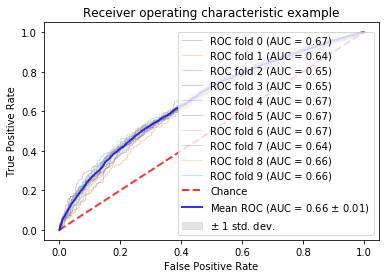

array([0.40160879, 0.23865981, 0.0192348 , ..., 0.20569094, 0.98110449,
       0.58497733])

In [3]:
cv = StratifiedKFold(n_splits=10)
results = np.zeros_like(y, dtype=float)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    keras.backend.clear_session()
    prbs=[]
    for mod in range(5):
        print('>>')
        curr_try = 0
        while curr_try <10:
            print('.')

            model = Sequential()
            model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(1, activation='sigmoid'))
            # Compile model
            opt = keras.optimizers.Adam(epsilon=None, amsgrad=True)
            model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
            
            # Fit the model
            history = model.fit(X[train,:], y[train], epochs=50, batch_size=64, verbose=0)
            if history.history['acc'][-1] > 0.53:
                break
            else:
                curr_try += 1

        # Fit the model
        model.fit(X[train,:], y[train], epochs=50, batch_size=64, verbose=1)
        
        # evaluate the model
        probas_ = model.predict(X[test,:])
        prbs.append(probas_)
    # Average the predictions
    probas_ = np.mean(np.hstack(prbs), axis=1)
    results[test] = probas_
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[ :])
    print('   ' + str(auc(fpr, tpr)))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
results

In [4]:
df_results = pd.DataFrame(data={"name": names, 'pred': results})
df_results.to_csv('/home/drewe/notebooks/genotox/pred.nn.v3.norm.csv', index=None)

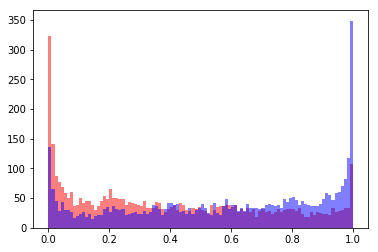

In [5]:
plt.hist(results[y==0],100, color='red', alpha=0.5)
plt.hist(results[y==1],100, color='blue', alpha=0.5)
plt.show()

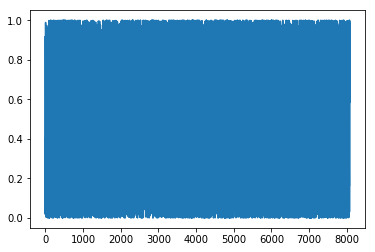

In [6]:
results[test] = probas_
plt.plot(results)

>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6205 - acc: 0.6522
Epoch 2/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6192 - acc: 0.6506
Epoch 3/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6182 - acc: 0.6555
Epoch 4/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6197 - acc: 0.6536
Epoch 5/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6192 - acc: 0.6562
Epoch 6/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6194 - acc: 0.6528
Epoch 7/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6172 - acc: 0.6550
Epoch 8/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6179 - acc: 0.6526
Epoch 9/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6167 - acc: 0.6568
Epoch 10/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6200 - acc: 0.6535
Epoch 11/50
72

7272/7272 [==============================] - 0s 22us/step - loss: 0.6167 - acc: 0.6577
Epoch 34/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6154 - acc: 0.6562
Epoch 35/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6156 - acc: 0.6579
Epoch 36/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6152 - acc: 0.6610
Epoch 37/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6152 - acc: 0.6592
Epoch 38/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6150 - acc: 0.6577
Epoch 39/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6135 - acc: 0.6597
Epoch 40/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6157 - acc: 0.6555
Epoch 41/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6146 - acc: 0.6587
Epoch 42/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6157 - acc: 0.6510
Epoch 43/50
7272/7272 

Epoch 16/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6193 - acc: 0.6555
Epoch 17/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6192 - acc: 0.6506
Epoch 18/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6201 - acc: 0.6514
Epoch 19/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6181 - acc: 0.6555
Epoch 20/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6170 - acc: 0.6550
Epoch 21/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6165 - acc: 0.6553
Epoch 22/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6193 - acc: 0.6539
Epoch 23/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6188 - acc: 0.6525
Epoch 24/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6180 - acc: 0.6476
Epoch 25/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6173 - acc: 0.6599
Epoch 26/5

7272/7272 [==============================] - 0s 22us/step - loss: 0.6135 - acc: 0.6581
Epoch 49/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6139 - acc: 0.6602
Epoch 50/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6130 - acc: 0.6616
   0.6952949322026628
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6185 - acc: 0.6536
Epoch 2/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6200 - acc: 0.6543
Epoch 3/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6192 - acc: 0.6608
Epoch 4/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6206 - acc: 0.6550
Epoch 5/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6196 - acc: 0.6521
Epoch 6/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6202 - acc: 0.6566
Epoch 7/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6197 - acc: 0.6543
Ep

7272/7272 [==============================] - 0s 22us/step - loss: 0.6170 - acc: 0.6554
Epoch 31/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6171 - acc: 0.6572
Epoch 32/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6160 - acc: 0.6564
Epoch 33/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6164 - acc: 0.6558
Epoch 34/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6163 - acc: 0.6531
Epoch 35/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6153 - acc: 0.6594
Epoch 36/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6161 - acc: 0.6580
Epoch 37/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6164 - acc: 0.6531
Epoch 38/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6159 - acc: 0.6568
Epoch 39/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6149 - acc: 0.6586
Epoch 40/50
7272/7272 

Epoch 13/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6172 - acc: 0.6579
Epoch 14/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6172 - acc: 0.6575
Epoch 15/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6179 - acc: 0.6532
Epoch 16/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6174 - acc: 0.6548
Epoch 17/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6179 - acc: 0.6520
Epoch 18/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6207 - acc: 0.6520
Epoch 19/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6178 - acc: 0.6540
Epoch 20/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6166 - acc: 0.6572
Epoch 21/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6182 - acc: 0.6548
Epoch 22/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6165 - acc: 0.6558
Epoch 23/5

7272/7272 [==============================] - 0s 22us/step - loss: 0.6152 - acc: 0.6561
Epoch 46/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6163 - acc: 0.6557
Epoch 47/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6130 - acc: 0.6594
Epoch 48/50
7272/7272 [==============================] - 0s 24us/step - loss: 0.6138 - acc: 0.6572
Epoch 49/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6135 - acc: 0.6547
Epoch 50/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6136 - acc: 0.6550
   0.6911652073746837
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6202 - acc: 0.6544
Epoch 2/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6191 - acc: 0.6565
Epoch 3/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6181 - acc: 0.6564
Epoch 4/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6189 - acc: 0.6558

7272/7272 [==============================] - 0s 22us/step - loss: 0.6143 - acc: 0.6638
Epoch 28/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6154 - acc: 0.6559
Epoch 29/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6159 - acc: 0.6586
Epoch 30/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6143 - acc: 0.6581
Epoch 31/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6149 - acc: 0.6575
Epoch 32/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6153 - acc: 0.6588
Epoch 33/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6150 - acc: 0.6576
Epoch 34/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6162 - acc: 0.6584
Epoch 35/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6170 - acc: 0.6544
Epoch 36/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6134 - acc: 0.6595
Epoch 37/50
7272/7272 

Epoch 10/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6174 - acc: 0.6617
Epoch 11/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6173 - acc: 0.6566
Epoch 12/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6185 - acc: 0.6531
Epoch 13/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6172 - acc: 0.6572
Epoch 14/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6162 - acc: 0.6557
Epoch 15/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6173 - acc: 0.6544
Epoch 16/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6173 - acc: 0.6525
Epoch 17/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6187 - acc: 0.6515
Epoch 18/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6161 - acc: 0.6588
Epoch 19/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6163 - acc: 0.6583
Epoch 20/5

7272/7272 [==============================] - 0s 22us/step - loss: 0.6137 - acc: 0.6588
Epoch 43/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6133 - acc: 0.6617
Epoch 44/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6144 - acc: 0.6573
Epoch 45/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6165 - acc: 0.6537
Epoch 46/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6129 - acc: 0.6599
Epoch 47/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6136 - acc: 0.6550
Epoch 48/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6124 - acc: 0.6572
Epoch 49/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6131 - acc: 0.6584
Epoch 50/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6134 - acc: 0.6590
   0.6865808823529411
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6181 - acc: 0.6

7272/7272 [==============================] - 0s 21us/step - loss: 0.6150 - acc: 0.6559
Epoch 25/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6150 - acc: 0.6575
Epoch 26/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6144 - acc: 0.6573
Epoch 27/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6130 - acc: 0.6613
Epoch 28/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6134 - acc: 0.6550
Epoch 29/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6136 - acc: 0.6581
Epoch 30/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6115 - acc: 0.6639
Epoch 31/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6114 - acc: 0.6610
Epoch 32/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6119 - acc: 0.6601
Epoch 33/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6116 - acc: 0.6565
Epoch 34/50
7272/7272 

7272/7272 [==============================] - 0s 23us/step - loss: 0.6189 - acc: 0.6525
Epoch 7/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6164 - acc: 0.6583
Epoch 8/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6162 - acc: 0.6603
Epoch 9/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6158 - acc: 0.6581
Epoch 10/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6168 - acc: 0.6540
Epoch 11/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6164 - acc: 0.6566
Epoch 12/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6143 - acc: 0.6575
Epoch 13/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6157 - acc: 0.6573
Epoch 14/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6152 - acc: 0.6635
Epoch 15/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6139 - acc: 0.6569
Epoch 16/50
7272/7272 [==

Epoch 39/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6109 - acc: 0.6588
Epoch 40/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6127 - acc: 0.6569
Epoch 41/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6121 - acc: 0.6587
Epoch 42/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6138 - acc: 0.6555
Epoch 43/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6112 - acc: 0.6613
Epoch 44/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6124 - acc: 0.6599
Epoch 45/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6123 - acc: 0.6583
Epoch 46/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6116 - acc: 0.6610
Epoch 47/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6115 - acc: 0.6624
Epoch 48/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6126 - acc: 0.6564
Epoch 49/5

7272/7272 [==============================] - 0s 21us/step - loss: 0.6154 - acc: 0.6603
Epoch 22/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6163 - acc: 0.6554
Epoch 23/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6156 - acc: 0.6533
Epoch 24/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6164 - acc: 0.6577
Epoch 25/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6203 - acc: 0.6568
Epoch 26/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6146 - acc: 0.6548
Epoch 27/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6140 - acc: 0.6614
Epoch 28/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6140 - acc: 0.6587
Epoch 29/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6140 - acc: 0.6595
Epoch 30/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6136 - acc: 0.6569
Epoch 31/50
7272/7272 

7272/7272 [==============================] - 0s 22us/step - loss: 0.6180 - acc: 0.6550
Epoch 4/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6183 - acc: 0.6548
Epoch 5/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6183 - acc: 0.6546
Epoch 6/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6198 - acc: 0.6515
Epoch 7/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6171 - acc: 0.6547
Epoch 8/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6162 - acc: 0.6557
Epoch 9/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6200 - acc: 0.6532
Epoch 10/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6175 - acc: 0.6555
Epoch 11/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6169 - acc: 0.6537
Epoch 12/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6171 - acc: 0.6554
Epoch 13/50
7272/7272 [=====

Epoch 36/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6136 - acc: 0.6594
Epoch 37/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6149 - acc: 0.6584
Epoch 38/50
7272/7272 [==============================] - 0s 24us/step - loss: 0.6136 - acc: 0.6624
Epoch 39/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6159 - acc: 0.6557
Epoch 40/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6136 - acc: 0.6586
Epoch 41/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6131 - acc: 0.6594
Epoch 42/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6145 - acc: 0.6614
Epoch 43/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6150 - acc: 0.6583
Epoch 44/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6151 - acc: 0.6608
Epoch 45/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6123 - acc: 0.6579
Epoch 46/5

7272/7272 [==============================] - 0s 23us/step - loss: 0.6184 - acc: 0.6533
Epoch 19/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6182 - acc: 0.6561
Epoch 20/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6169 - acc: 0.6591
Epoch 21/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6178 - acc: 0.6587
Epoch 22/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6179 - acc: 0.6555
Epoch 23/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6190 - acc: 0.6517
Epoch 24/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6173 - acc: 0.6529
Epoch 25/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6165 - acc: 0.6572
Epoch 26/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6176 - acc: 0.6564
Epoch 27/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6170 - acc: 0.6554
Epoch 28/50
7272/7272 

7272/7272 [==============================] - 0s 22us/step - loss: 0.6159 - acc: 0.6612
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6211 - acc: 0.6515
Epoch 2/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6203 - acc: 0.6550
Epoch 3/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6225 - acc: 0.6471
Epoch 4/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6216 - acc: 0.6514
Epoch 5/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6200 - acc: 0.6551
Epoch 6/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6212 - acc: 0.6493
Epoch 7/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6215 - acc: 0.6544
Epoch 8/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6193 - acc: 0.6546
Epoch 9/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6187 - acc: 0.6564
Epoch 10/50
7272/7272 [===

Epoch 33/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6178 - acc: 0.6579
Epoch 34/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6169 - acc: 0.6557
Epoch 35/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6161 - acc: 0.6598
Epoch 36/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6163 - acc: 0.6619
Epoch 37/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6194 - acc: 0.6566
Epoch 38/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6167 - acc: 0.6613
Epoch 39/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6175 - acc: 0.6576
Epoch 40/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6157 - acc: 0.6620
Epoch 41/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6147 - acc: 0.6591
Epoch 42/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6163 - acc: 0.6613
Epoch 43/5

7272/7272 [==============================] - 0s 21us/step - loss: 0.6173 - acc: 0.6531
Epoch 16/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6159 - acc: 0.6587
Epoch 17/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6157 - acc: 0.6584
Epoch 18/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6165 - acc: 0.6532
Epoch 19/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6155 - acc: 0.6540
Epoch 20/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6139 - acc: 0.6575
Epoch 21/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6164 - acc: 0.6543
Epoch 22/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6151 - acc: 0.6586
Epoch 23/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6143 - acc: 0.6555
Epoch 24/50
7272/7272 [==============================] - 0s 26us/step - loss: 0.6141 - acc: 0.6562
Epoch 25/50
7272/7272 

7272/7272 [==============================] - 0s 22us/step - loss: 0.6128 - acc: 0.6577
Epoch 48/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6139 - acc: 0.6598
Epoch 49/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6121 - acc: 0.6612
Epoch 50/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6122 - acc: 0.6614
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6183 - acc: 0.6580
Epoch 2/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6180 - acc: 0.6581
Epoch 3/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6186 - acc: 0.6537
Epoch 4/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6173 - acc: 0.6575
Epoch 5/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6176 - acc: 0.6572
Epoch 6/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6191 - acc: 0.6562
Epoch 7/50
7272/7272 [=

Epoch 30/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6138 - acc: 0.6588
Epoch 31/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6174 - acc: 0.6581
Epoch 32/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6143 - acc: 0.6612
Epoch 33/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6143 - acc: 0.6609
Epoch 34/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6152 - acc: 0.6572
Epoch 35/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6136 - acc: 0.6573
Epoch 36/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6151 - acc: 0.6583
Epoch 37/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6140 - acc: 0.6579
Epoch 38/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6135 - acc: 0.6598
Epoch 39/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6146 - acc: 0.6564
Epoch 40/5

7272/7272 [==============================] - 0s 22us/step - loss: 0.6174 - acc: 0.6565
Epoch 13/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6177 - acc: 0.6544
Epoch 14/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6166 - acc: 0.6580
Epoch 15/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6161 - acc: 0.6546
Epoch 16/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6156 - acc: 0.6599
Epoch 17/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6170 - acc: 0.6557
Epoch 18/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6156 - acc: 0.6562
Epoch 19/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6154 - acc: 0.6591
Epoch 20/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6154 - acc: 0.6565
Epoch 21/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6162 - acc: 0.6573
Epoch 22/50
7272/7272 

7272/7272 [==============================] - 0s 22us/step - loss: 0.6146 - acc: 0.6557
Epoch 45/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6129 - acc: 0.6569
Epoch 46/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6145 - acc: 0.6561
Epoch 47/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6135 - acc: 0.6575
Epoch 48/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6119 - acc: 0.6591
Epoch 49/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6141 - acc: 0.6568
Epoch 50/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6129 - acc: 0.6562
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6178 - acc: 0.6546
Epoch 2/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6184 - acc: 0.6529
Epoch 3/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6181 - acc: 0.6551
Epoch 4/50
7272/7272

Epoch 27/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6159 - acc: 0.6573
Epoch 28/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6157 - acc: 0.6616
Epoch 29/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6139 - acc: 0.6601
Epoch 30/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6160 - acc: 0.6531
Epoch 31/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6152 - acc: 0.6609
Epoch 32/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6131 - acc: 0.6588
Epoch 33/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6154 - acc: 0.6580
Epoch 34/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6142 - acc: 0.6605
Epoch 35/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6159 - acc: 0.6573
Epoch 36/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6158 - acc: 0.6532
Epoch 37/5

7272/7272 [==============================] - 0s 21us/step - loss: 0.6167 - acc: 0.6566
Epoch 10/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6164 - acc: 0.6564
Epoch 11/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6181 - acc: 0.6547
Epoch 12/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6167 - acc: 0.6609
Epoch 13/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6176 - acc: 0.6572
Epoch 14/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6177 - acc: 0.6537
Epoch 15/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6162 - acc: 0.6553
Epoch 16/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6159 - acc: 0.6599
Epoch 17/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6168 - acc: 0.6587
Epoch 18/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6160 - acc: 0.6543
Epoch 19/50
7272/7272 

7272/7272 [==============================] - 0s 23us/step - loss: 0.6149 - acc: 0.6579
Epoch 42/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6142 - acc: 0.6602
Epoch 43/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6148 - acc: 0.6605
Epoch 44/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6166 - acc: 0.6553
Epoch 45/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6142 - acc: 0.6594
Epoch 46/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6153 - acc: 0.6554
Epoch 47/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6147 - acc: 0.6575
Epoch 48/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6139 - acc: 0.6590
Epoch 49/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6140 - acc: 0.6614
Epoch 50/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6134 - acc: 0.6606
>>
.
Epoch 1/50
7272/7

Epoch 24/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6164 - acc: 0.6565
Epoch 25/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6166 - acc: 0.6652
Epoch 26/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6154 - acc: 0.6599
Epoch 27/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6161 - acc: 0.6609
Epoch 28/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6175 - acc: 0.6587
Epoch 29/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6167 - acc: 0.6575
Epoch 30/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6157 - acc: 0.6576
Epoch 31/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6171 - acc: 0.6547
Epoch 32/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6167 - acc: 0.6533
Epoch 33/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6196 - acc: 0.6544
Epoch 34/5

7272/7272 [==============================] - 0s 21us/step - loss: 0.6200 - acc: 0.6562
Epoch 7/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6161 - acc: 0.6583
Epoch 8/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6180 - acc: 0.6591
Epoch 9/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6162 - acc: 0.6532
Epoch 10/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6174 - acc: 0.6572
Epoch 11/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6151 - acc: 0.6588
Epoch 12/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6148 - acc: 0.6587
Epoch 13/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6161 - acc: 0.6624
Epoch 14/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6167 - acc: 0.6568
Epoch 15/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6164 - acc: 0.6533
Epoch 16/50
7272/7272 [==

Epoch 39/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6136 - acc: 0.6581
Epoch 40/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6149 - acc: 0.6638
Epoch 41/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6132 - acc: 0.6619
Epoch 42/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6121 - acc: 0.6588
Epoch 43/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6132 - acc: 0.6566
Epoch 44/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6122 - acc: 0.6590
Epoch 45/50
7272/7272 [==============================] - 0s 21us/step - loss: 0.6113 - acc: 0.6652
Epoch 46/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6134 - acc: 0.6562
Epoch 47/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6125 - acc: 0.6601
Epoch 48/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6127 - acc: 0.6638
Epoch 49/5

7272/7272 [==============================] - 0s 22us/step - loss: 0.6150 - acc: 0.6535
Epoch 22/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6143 - acc: 0.6564
Epoch 23/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6140 - acc: 0.6587
Epoch 24/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6146 - acc: 0.6558
Epoch 25/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6150 - acc: 0.6595
Epoch 26/50
7272/7272 [==============================] - 0s 23us/step - loss: 0.6181 - acc: 0.6553
Epoch 27/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6136 - acc: 0.6532
Epoch 28/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6172 - acc: 0.6526
Epoch 29/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6141 - acc: 0.6597
Epoch 30/50
7272/7272 [==============================] - 0s 22us/step - loss: 0.6126 - acc: 0.6588
Epoch 31/50
7272/7272 

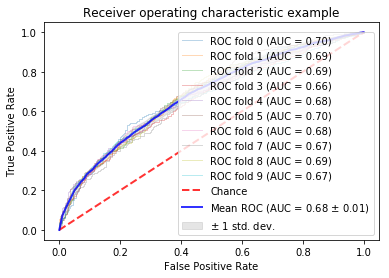

array([0.70463479, 0.57834029, 0.35220766, ..., 0.52625859, 0.25496623,
       0.43516079])

In [7]:
#Logistic regression (SGD)
cv = StratifiedKFold(n_splits=10)
results = np.zeros_like(y, dtype=float)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    keras.backend.clear_session()
    prbs=[]
    for mod in range(5):
        print('>>')
        curr_try = 0
        while curr_try <10:
            print('.')

            model = Sequential()
            model.add(Dense(1, activation='sigmoid'))
            # Compile model
            opt = keras.optimizers.Adam(epsilon=None, amsgrad=True)
            model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
            
            # Fit the model
            history = model.fit(X[train,:], y[train], epochs=50, batch_size=64, verbose=0)
            if history.history['acc'][-1] > 0.53:
                break
            else:
                curr_try += 1

        # Fit the model
        model.fit(X[train,:], y[train], epochs=50, batch_size=64, verbose=1)
        
        # evaluate the model
        probas_ = model.predict(X[test,:])
        prbs.append(probas_)
    # Average the predictions
    probas_ = np.mean(np.hstack(prbs), axis=1)
    results[test] = probas_
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[ :])
    print('   ' + str(auc(fpr, tpr)))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
results

In [8]:
df_results = pd.DataFrame(data={"name": names, 'pred': results})
df_results.to_csv('/home/drewe/notebooks/genotox/pred.lr.v3.norm.csv', index=None)

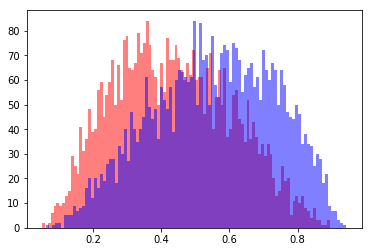

In [9]:
plt.hist(results[y==0],100, color='red', alpha=0.5)
plt.hist(results[y==1],100, color='blue', alpha=0.5)
plt.show()

/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.6685537828100875


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.7202411587383281


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.7168627450980394


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.6643872549019608


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.671936274509804


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.6846323529411765


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.6668872549019609


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.6213235294117647


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.6297058823529411


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.6967401960784314


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.6637254901960785


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.713872549019608


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.6824999999999999


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.6579166666666668


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.640735294117647


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.6849264705882354


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.6687990196078433


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.6941176470588236


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.6903676470588236


/fast_data/drewe/software/envs/tf_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   0.6391176470588235


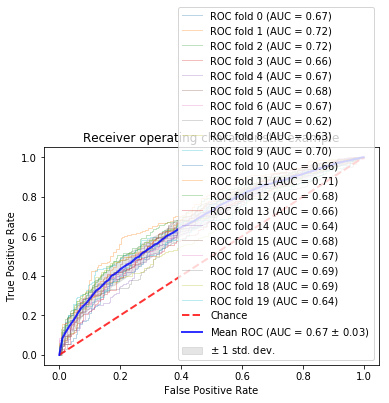

array([0.73577705, 0.50272183, 0.19845793, ..., 0.3937505 , 0.3072859 ,
       0.41628284])

In [10]:
#Logistic regression (scikit)
cv = StratifiedKFold(n_splits=20)
results = np.zeros_like(y, dtype=float)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    keras.backend.clear_session()
    prbs=[]
    model = LogisticRegression(random_state=0)
    model.fit(X[train,:], y[train])
    probas_ = model.predict_proba(X[test,:])[:, 1]
    results[test] = probas_
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[ :])
    print('   ' + str(auc(fpr, tpr)))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
results

In [11]:
df_results = pd.DataFrame(data={"name": names, 'pred': results})
df_results.to_csv('/home/drewe/notebooks/genotox/pred.lr2.v3.norm.csv', index=None)

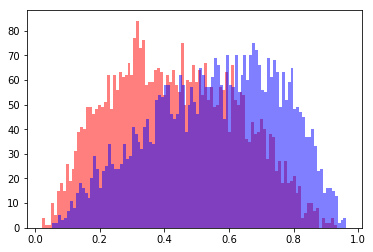

In [12]:
plt.hist(results[y==0],100, color='red', alpha=0.5)
plt.hist(results[y==1],100, color='blue', alpha=0.5)
plt.show()

>>
   0.6996023454876323
>>
   0.6807397966998965
>>
   0.706390931372549
>>
   0.6830269607843136
>>
   0.6797181372549019
>>
   0.6988848039215687
>>
   0.7022120098039215
>>
   0.6979289215686274
>>
   0.7029473039215686
>>
   0.7025183823529413


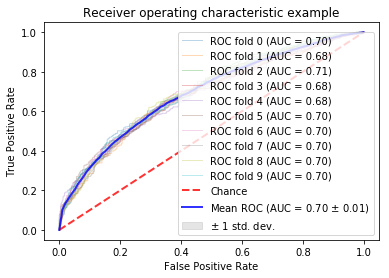

array([0.54703285, 0.55016726, 0.34399391, ..., 0.4632062 , 0.38298533,
       0.47006439])

In [13]:
cv = StratifiedKFold(n_splits=10)
results = np.zeros_like(y, dtype=float)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    print('>>')
    keras.backend.clear_session()
    prbs=[]
    model = RandomForestClassifier(n_estimators=1000, random_state=0, max_leaf_nodes=200)
    # Fit the model
    model.fit(X[train,:], y[train])

    
    probas_ = model.predict_proba(X[test,:])[:, 1]
    results[test] = probas_

    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[ :])
    print('   ' + str(auc(fpr, tpr)))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
results

In [14]:
df_results = pd.DataFrame(data={"name": names, 'pred': results})
df_results.to_csv('/home/drewe/notebooks/genotox/pred.rf.v3.norm.csv', index=None)

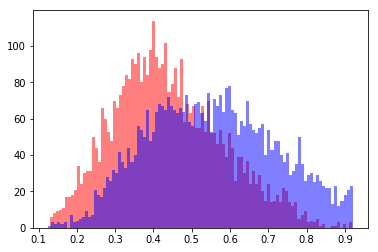

In [15]:
plt.hist(results[y==0],100, color='red', alpha=0.5)
plt.hist(results[y==1],100, color='blue', alpha=0.5)
plt.show()